In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

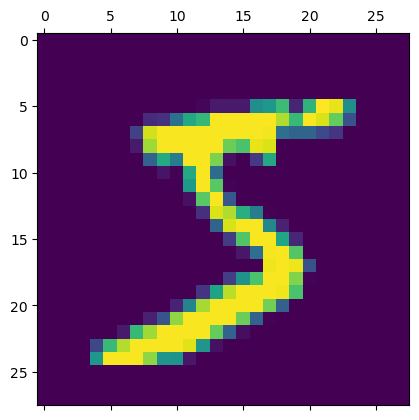

In [9]:
plt.matshow(X_train[0])

In [10]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),28*28)

In [13]:
X_train_flat.shape

(60000, 784)

In [14]:
X_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [20]:
model= keras.Sequential([keras.layers.Dense(10,input_shape=(784,) ,activation='sigmoid' )])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train_flat,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 899us/step - loss: 10.2447 - accuracy: 0.8376
Epoch 2/5
1875/1875 [==============================] - 1s 790us/step - loss: 6.0579 - accuracy: 0.8786
Epoch 3/5
1875/1875 [==============================] - 2s 869us/step - loss: 5.6469 - accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 2s 829us/step - loss: 5.5353 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 2s 804us/step - loss: 5.3847 - accuracy: 0.8872


In [25]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 716us/step - loss: 6.6946 - accuracy: 0.8769


[6.694577217102051, 0.8769000172615051]

In [29]:
y_predict=model.predict(X_test_flat)
y_predict[0]

array([5.153091e-19, 0.000000e+00, 9.999997e-01, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00], dtype=float32)

In [30]:
np.argmax(y_predict[0])

3

In [33]:
y_predicted_labels=[np.argmax(i) for i in y_predict]

In [34]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [35]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   4, 1130,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 425,  381,  221,    2,    2,    0,    1,    0,    0,    0],
       [ 260,  392,  225,  133,    0,    0,    0,    0,    0,    0],
       [ 186,  242,  148,  230,  176,    0,    0,    0,    0,    0],
       [ 353,  111,  155,  194,   70,    7,    1,    0,    1,    0],
       [ 401,  186,  359,    6,    6,    0,    0,    0,    0,    0],
       [ 149,  183,  245,  432,   12,    2,    0,    5,    0,    0],
       [ 172,  567,  180,   30,   18,    7,    0,    0,    0,    0],
       [ 117,  217,  115,  476,   82,    0,    0,    2,    0,    0]])>

Text(95.72222222222221, 0.5, 'Truth')

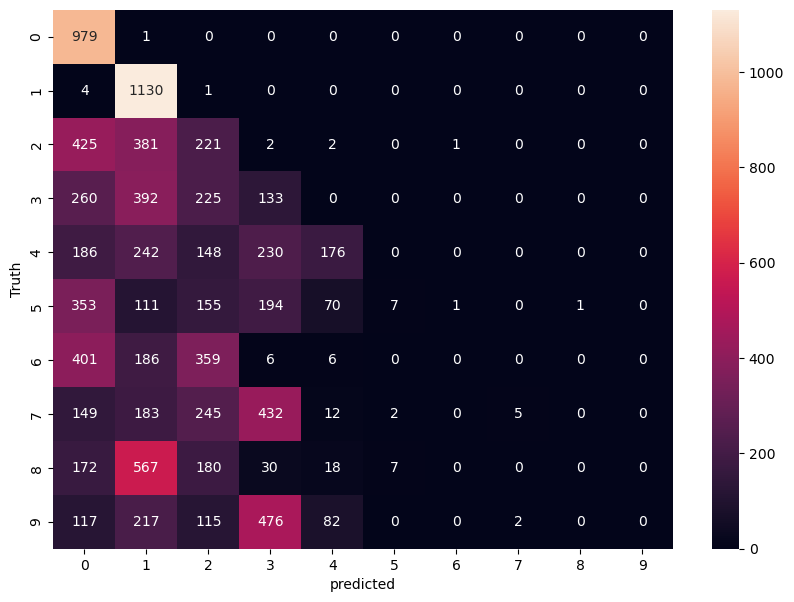

In [37]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [65]:
#adding some more hidden layers

In [67]:
model1= keras.Sequential([keras.layers.Dense(100,input_shape=(784,) ,activation='relu' ),
                        keras.layers.Dense(100, activation='relu'),
                        keras.layers.Dense(50, activation='sigmoid'),
                        keras.layers.Dense(10, activation='sigmoid')])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model1.fit(X_train_flat,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5461 - accuracy: 0.8494
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2805 - accuracy: 0.9192
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2584 - accuracy: 0.9252
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2429 - accuracy: 0.9306
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2365 - accuracy: 0.9312


In [68]:
model1.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2206 - accuracy: 0.9396


[0.22063054144382477, 0.9395999908447266]

In [69]:
y_predict=model1.predict(X_test_flat)
y_predict[0]

array([0.01056135, 0.02568662, 0.34424406, 0.22132573, 0.01278791,
       0.2505327 , 0.00685531, 0.9843513 , 0.00614157, 0.4205437 ],
      dtype=float32)

In [70]:
y_predicted_labels=[np.argmax(i) for i in y_predict]

In [71]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

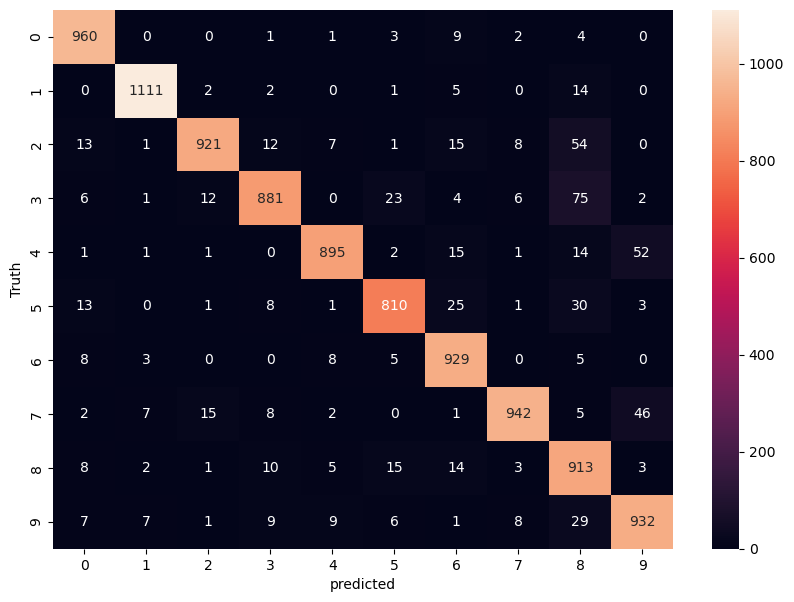

In [64]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')